In [1]:
from src.graphs import SPGraph
from src.mining import compute_communities

In [2]:
N = 640
rho = 1
k = 16
comm_sizes = [160, 40, 10]

# N = 100
# rho = 1
# k = 16
# comm_sizes = [50, 20, 10]

graph = SPGraph(N, rho, k, comm_sizes)

In [3]:
net = graph.get_pyvis_net(level=2, notebook=True)
# net.show(name='network.html')

In [4]:
scales, communities = compute_communities(
    graph=graph,
    scales_num=50,
    r_num=60)

In [5]:
net = graph.get_pyvis_net(level=40, notebook=True, predicted_communities=communities)
# net.show('network_predicted.html')

In [6]:
def rand_index(p1, p2):
    pairs1 = np.array([
        [
            p1[i] == p1[j]
            for j in range(len(p1))
        ]
        for i in range(len(p1))
    ])
    pairs2 = np.array([
        [
            p2[i] == p2[j]
            for j in range(len(p2))
        ]
        for i in range(len(p2))
    ])
    a = np.logical_and(pairs1, pairs2).sum()
    b = np.logical_and(1 - pairs1, 1 - pairs2).sum()
    c = np.logical_and(pairs1, 1 - pairs2).sum()
    d = np.logical_and(1 - pairs1, pairs2).sum()
    return (a + b) / (a + b + c + d)

In [13]:
from math import comb

def adjusted_rand_index(p1, p2):
    n = len(p1)
    n_scales_1 = max(p1)
    n_scales_2 = max(p2)
    matrix = np.zeros((n_scales_1, n_scales_2))
    for i, j in zip(p1, p2):
        matrix[i - 1, j - 1] += 1
    
    col_sum = np.sum(matrix, axis=0)
    row_sum = np.sum(matrix, axis=1)
    
    square_col_sum = np.sum(col_sum ** 2)
    square_row_sum = np.sum(row_sum ** 2)
    
    t1 = comb(n, 2)
    t2 = np.sum(matrix ** 2)
    t3 = 0.5 * (square_col_sum + square_row_sum)
    
    
    nc = (
        n * (n ** 2 + 1) 
        - (n + 1) * square_row_sum 
        - (n + 1) * square_col_sum 
        + 2 * (square_row_sum * square_col_sum) / n
    ) / (2 * (n - 1))
    
    A = t1 + t2 - t3

    if t1 == nc:
        return 0
    return (A - nc) / (t1 - nc)

100%|██████████| 50/50 [00:00<00:00, 572.92it/s]


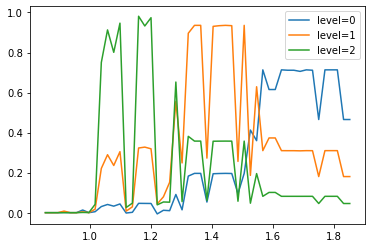

In [17]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

plt.figure()
for level in [0, 1, 2]:
    rand_idx = [
        adjusted_rand_index(communities[:, i], graph.communities[:, level])
        for i, scale in tqdm(enumerate(scales), total=len(scales))
    ]
    plt.plot(np.log10(scales), rand_idx, label=f'level={level}')
plt.legend()
plt.show()